In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv("Churn_Modelling.csv")
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
bank.shape

(10000, 14)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# cek duplikat
bank.duplicated().sum()

0

**Split Data Input-Ouput**

In [6]:
# fungsi untuk membagi data input output
def extractInputOutput(bank,
                       output_column_name,
                       column_to_drop):
    """
    Fungsi untuk memisahkan data input dan output
    :param data: <pandas dataframe> data seluruh sample
    :param output_column_name: <string> nama kolom output
    :return input_data: <pandas dataframe> data input
    :return output_data: <pandas series> data output
    """
    # drop data
    bank = bank.drop(columns = column_to_drop)
    output_data = bank[output_column_name]
    input_data = bank.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data


In [7]:
column_to_drop = ["RowNumber","CustomerId","Surname"]
output_column_name = ["Exited"]

X, y = extractInputOutput(bank = bank,
                          output_column_name = output_column_name,
                          column_to_drop = column_to_drop)

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [10]:
# Baseline
y.value_counts(normalize=True)

Exited
0         0.7963
1         0.2037
dtype: float64

## Data Splitting

**Split train dan test**

In [11]:
# membagi data menjadi train dan test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 77)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000, 1), (2000, 1))

## EDA

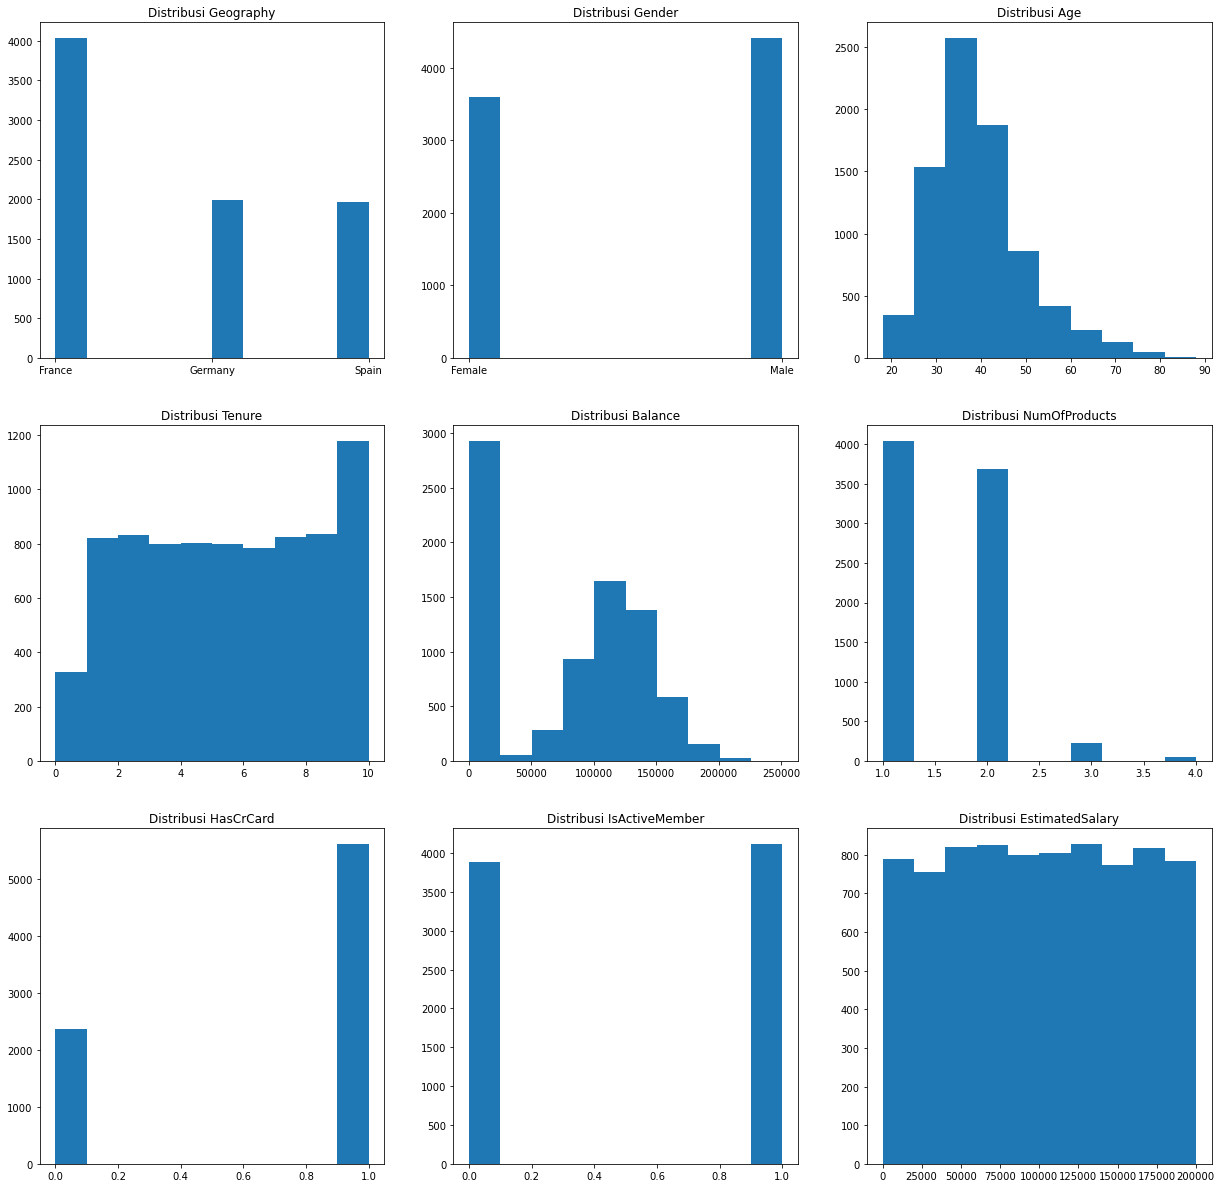

In [12]:
# Univariate Analysis untuk melihat distribusi fitur yang ada
columns_ = ["Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]
index_ = 0
fig, ax = plt.subplots(3,3, figsize = (21,21)) # membuat figur dan axis untuk subplots
for row in range(3):
    for col in range(3):
        ax[row,col].hist(X_train[columns_[index_]])
        ax[row,col].set_title(f"Distribusi {columns_[index_]}")
        index_ += 1
plt.show()

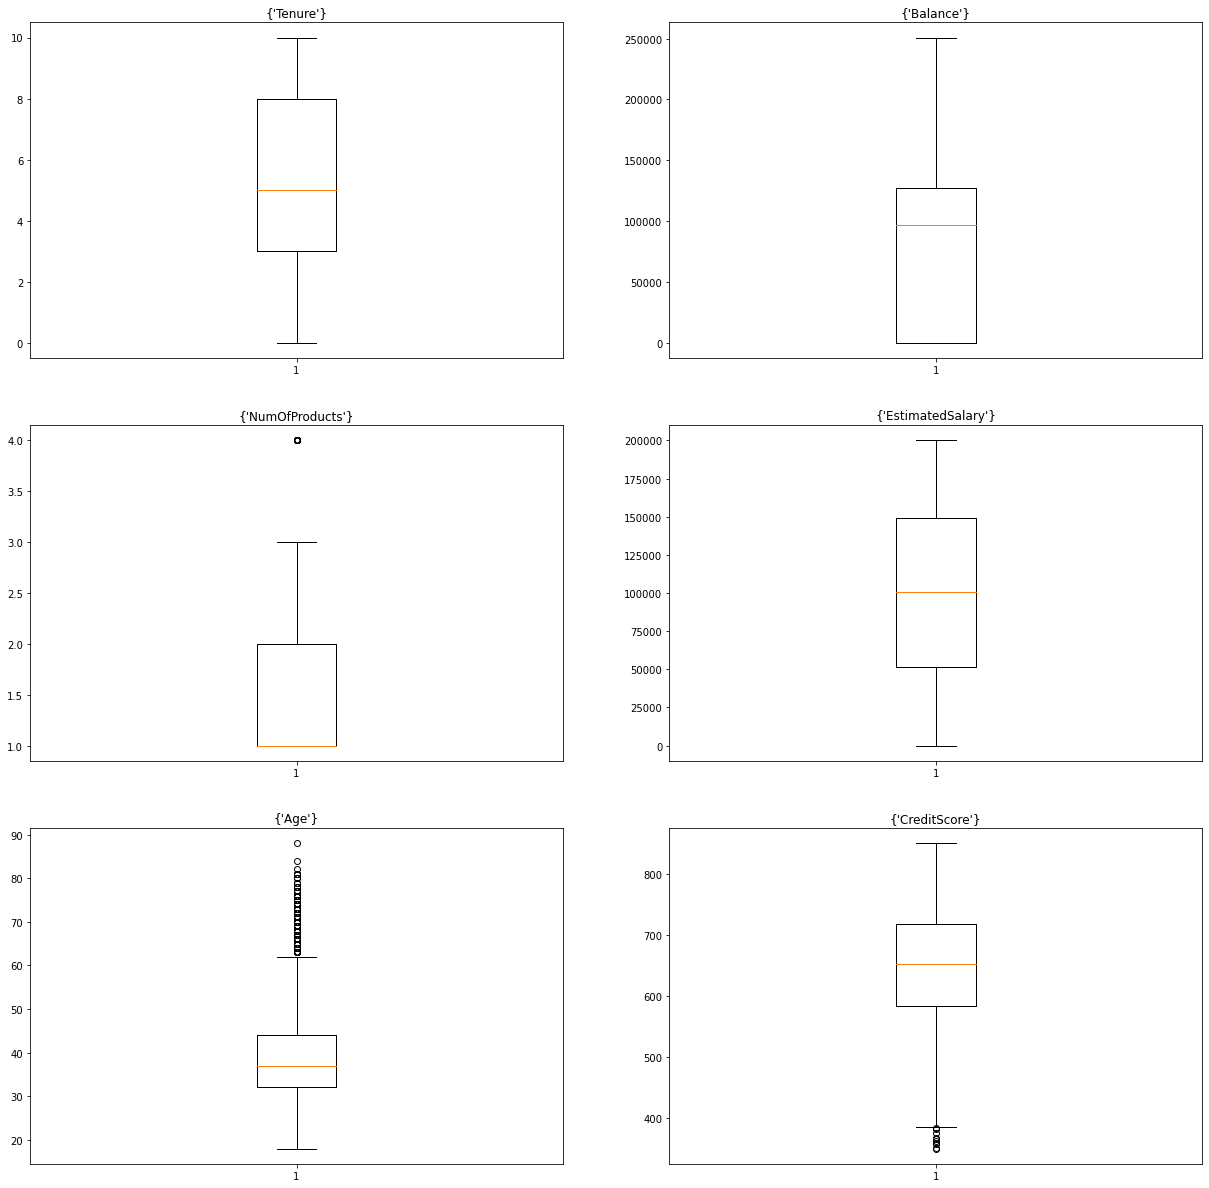

In [13]:
# Analysis melihat persebaran data dan cek outlier fitur numeric dengan boxplot
columns1_ = ["Tenure","Balance","NumOfProducts","EstimatedSalary","Age","CreditScore"]
index_ = 0
fig, ax = plt.subplots(3,2, figsize = (21,21)) # membuat figur dan axis untuk subplots
for row in range(3):
    for col in range(2):
        ax[row,col].boxplot(X_train[columns1_[index_]])
        ax[row,col].set_title({columns1_[index_]})
        index_ += 1
plt.show()

Walaupun pada fitur Age dan CreditScore terdapat outlier, disini tidak dilakukan handling outlier. Karna umur konsumen bank tidak akan ada kesalahan input / memang umur konsumen seperti itu. Sedangkan creditscore biasanya diberikan oleh aplikasi, sehingga sangat jarang ada kesalahan.

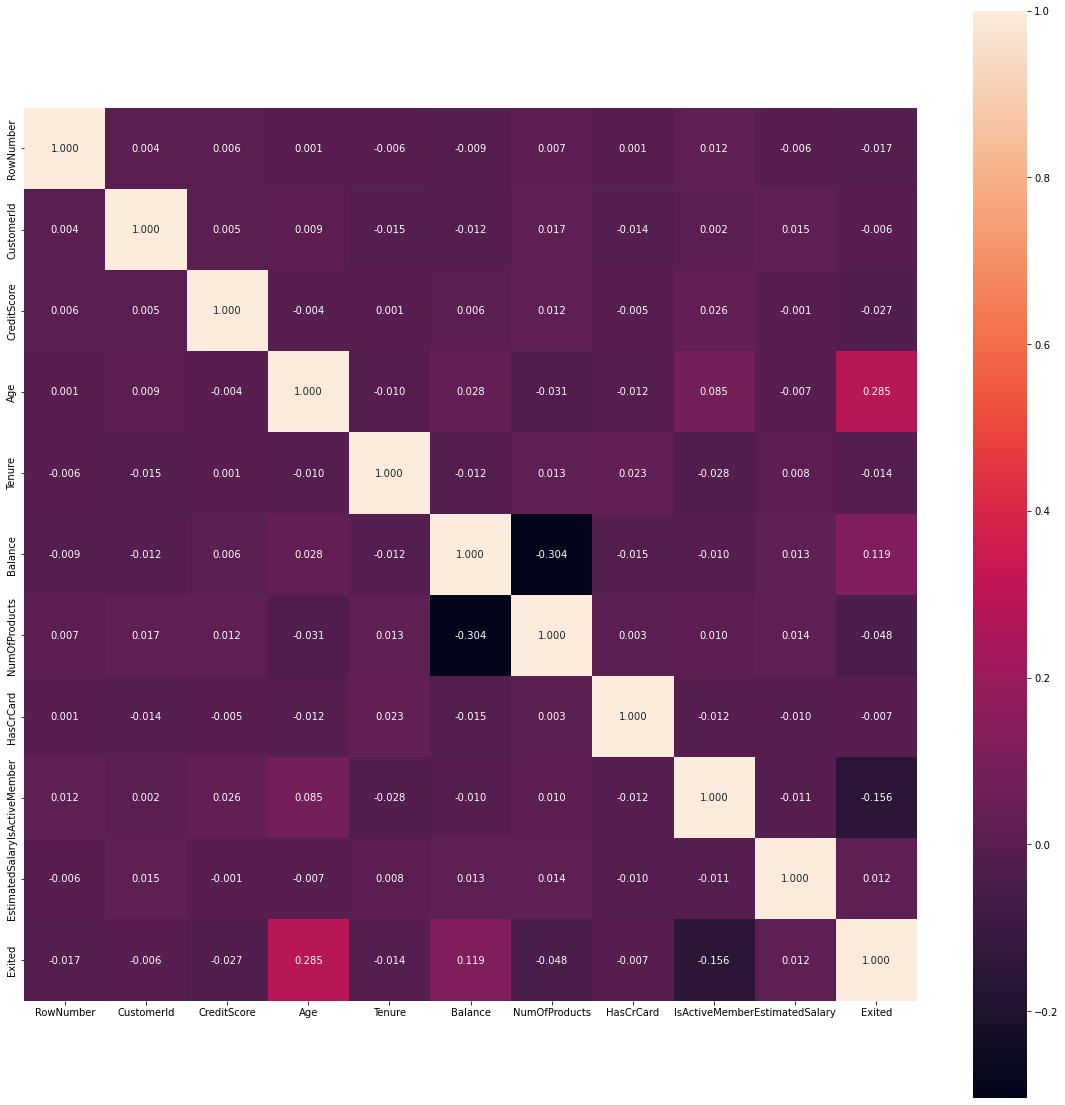

In [14]:
# korelasi antar variabel numerik dengan fitur output Exited.
plt.figure(figsize = (20,20))
sns.heatmap(bank.corr(), fmt= ".3f", annot= True,square= True)
plt.show()

Fitur Age dan Balance mempunyai korelasi positif walaupun tidak terlalu kuat. Fitur IsActiveMember mempunyai korelasi negatif walaupun tidak teralu kuat.

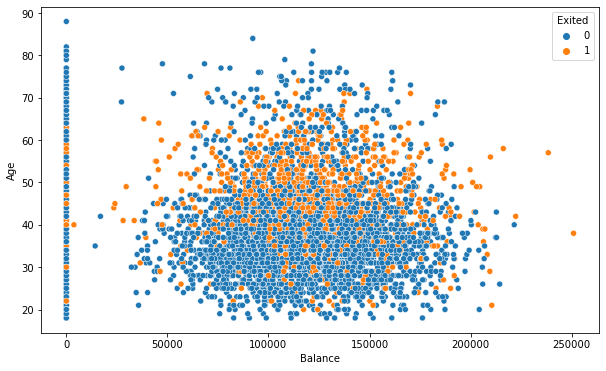

In [15]:
# Bivariate Analysis fitur yang mempunyai korelasi dengan fitur exited.
plt.figure(figsize=(10,6))
sns.scatterplot(data=X_train, x=X_train["Balance"], y=X_train["Age"], hue=y_train["Exited"])
plt.show()

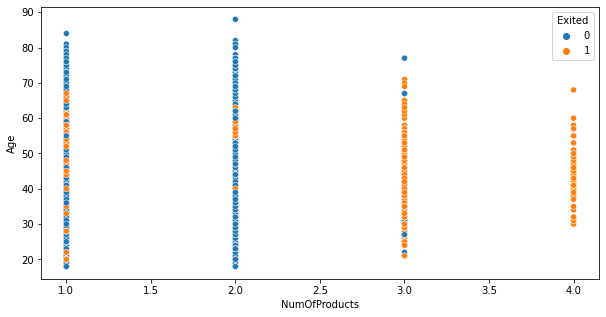

In [16]:
# Bivariate Analysis fitur yang mempunyai korelasi dengan fitur exited.
plt.figure(figsize=(10,5))
sns.scatterplot(data=X_train, x=X_train["NumOfProducts"], y=X_train["Age"], hue=y_train["Exited"])
plt.show()

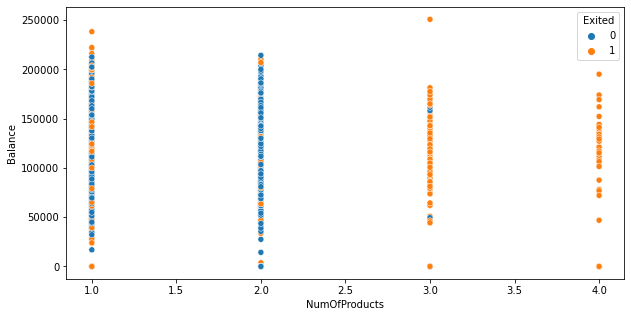

In [17]:
# Bivariate Analysis fitur yang mempunyai korelasi dengan fitur exited.
plt.figure(figsize=(10,5))
sns.scatterplot(data=X_train, x=X_train["NumOfProducts"], y=X_train["Balance"], hue=y_train["Exited"])
plt.show()

**Splitting Categorical & Numerical Column**

In [18]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
191,512,France,Female,36,3,84327.77,2,1,0,17675.36
4477,679,Germany,Male,52,9,135870.01,2,0,0,54038.62
6369,646,France,Female,38,2,0.00,2,0,0,178752.73
4643,597,France,Female,60,0,131778.08,1,0,0,10703.53
1899,627,Spain,Female,30,6,0.00,1,1,1,113408.47


In [19]:
categorical_col = ["Geography","Gender","HasCrCard","IsActiveMember"]
numerical_col = list(set(X_train.columns) - set(categorical_col))

categorical_col, numerical_col

(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'],
 ['NumOfProducts',
  'Tenure',
  'EstimatedSalary',
  'Age',
  'Balance',
  'CreditScore'])

In [20]:
# fungsi split numeric dan categoric data
def splitNumCat(data, num_col, cat_col):
    data_num = data[num_col]
    data_cat = data[cat_col]

    return data_num, data_cat
    

In [21]:
X_train_num, X_train_cat = splitNumCat(data = X_train,
                                       num_col = numerical_col,
                                       cat_col = categorical_col)

**Handling Numerical Data**

In [22]:
# cek missing value
X_train_num.isna().sum()

NumOfProducts      0
Tenure             0
EstimatedSalary    0
Age                0
Balance            0
CreditScore        0
dtype: int64

In [23]:
# fungsi imputer numeric data dapat digunakan jika ada data test yang kosong
from sklearn.impute import SimpleImputer

def imputerNum(data, imputer = None):
    if imputer == None:
        # Buat imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer


In [24]:
X_train_num_imputed, imputer_num = imputerNum(data = X_train_num)

In [25]:
X_train_num_imputed.head()

,NumOfProducts,Tenure,EstimatedSalary,Age,Balance,CreditScore
191,2.0,3.0,17675.36,36.0,84327.77,512.0
4477,2.0,9.0,54038.62,52.0,135870.01,679.0
6369,2.0,2.0,178752.73,38.0,0.00,646.0
4643,1.0,0.0,10703.53,60.0,131778.08,597.0
1899,1.0,6.0,113408.47,30.0,0.00,627.0


**Handling Categorical Data**

In [26]:
X_train_cat.head()

,Geography,Gender,HasCrCard,IsActiveMember
191,France,Female,1,0
4477,Germany,Male,0,0
6369,France,Female,0,0
4643,France,Female,0,0
1899,Spain,Female,1,1


In [27]:
X_train_cat.isna().sum()

Geography         0
Gender            0
HasCrCard         0
IsActiveMember    0
dtype: int64

In [28]:
# fungsi imputer categorical data dapat digunakan jika ada data test yang kosong
def imputerCat(data, imputer = None):
    if imputer == None:
        # Buat imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "constant",
                                fill_value = "UNKNOWN")
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer


In [29]:
X_train_cat_imputed, imputer_cat = imputerCat(data = X_train_cat)

In [30]:
X_train_cat_imputed.head()

,Geography,Gender,HasCrCard,IsActiveMember
191,France,Female,1,0
4477,Germany,Male,0,0
6369,France,Female,0,0
4643,France,Female,0,0
1899,Spain,Female,1,1


**One Hot Encoding Data**

In [31]:
# fungsi untuk mengubah data categoric menjadi numeric
from sklearn.preprocessing import OneHotEncoder

def encoderCat(data, encoder_col = None, encoder = None):
    if encoder == None:
        # Buat objek
        encoder = OneHotEncoder(handle_unknown = "ignore",
                                drop = "if_binary")
        encoder.fit(data)
        encoder_col = encoder.get_feature_names_out(data.columns)

    # Transform data
    data_encoded = encoder.transform(data).toarray()
    data_encoded = pd.DataFrame(data_encoded,
                                index = data.index,
                                columns = encoder_col)
    
    return data_encoded, encoder_col, encoder


In [32]:
X_train_cat_encoded, encoder_col, encoder_OHE = encoderCat(data = X_train_cat_imputed)

In [33]:
X_train_cat_encoded.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
191,1.0,0.0,0.0,0.0,1.0,0.0
4477,0.0,1.0,0.0,1.0,0.0,0.0
6369,1.0,0.0,0.0,0.0,0.0,0.0
4643,1.0,0.0,0.0,0.0,0.0,0.0
1899,0.0,0.0,1.0,0.0,1.0,1.0


In [34]:
# Simpan kolom OHE untuk diimplementasikan dalam testing data
# Agar shape-nya konsisten
ohe_columns = X_train_cat_encoded.columns

In [35]:
encoder_col

array(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'HasCrCard_1', 'IsActiveMember_1'], dtype=object)

### Join data Numerical dan Categorical

In [36]:
# gabung data numeric dan categoric
X_train_concat = pd.concat([X_train_num_imputed,
                            X_train_cat_encoded],
                           axis = 1)

In [37]:
X_train_concat

,NumOfProducts,Tenure,EstimatedSalary,Age,Balance,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
191,2.0,3.0,17675.36,36.0,84327.77,512.0,1.0,0.0,0.0,0.0,1.0,0.0
4477,2.0,9.0,54038.62,52.0,135870.01,679.0,0.0,1.0,0.0,1.0,0.0,0.0
6369,2.0,2.0,178752.73,38.0,0.00,646.0,1.0,0.0,0.0,0.0,0.0,0.0
4643,1.0,0.0,10703.53,60.0,131778.08,597.0,1.0,0.0,0.0,0.0,0.0,0.0
1899,1.0,6.0,113408.47,30.0,0.00,627.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6122,1.0,3.0,5075.17,44.0,116967.68,619.0,1.0,0.0,0.0,1.0,1.0,0.0
2945,1.0,4.0,180197.74,20.0,124365.42,835.0,0.0,1.0,0.0,1.0,0.0,0.0
2418,1.0,6.0,20339.79,40.0,0.00,614.0,1.0,0.0,0.0,1.0,1.0,1.0
905,1.0,9.0,92027.69,45.0,0.00,672.0,1.0,0.0,0.0,0.0,1.0,1.0


In [38]:
X_train_concat.shape

(8000, 12)

In [39]:
X_train_concat.isna().sum()

NumOfProducts        0
Tenure               0
EstimatedSalary      0
Age                  0
Balance              0
CreditScore          0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
HasCrCard_1          0
IsActiveMember_1     0
dtype: int64

**Standarisasi Data**

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# funsi untuk standarisasi data 
def standardizeData(data, scaler = None):
    if scaler == None:
        # Buat & Fit scaler
        scaler = StandardScaler()
        scaler.fit(data)

    # Tranform data
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled,
                               index = data.index,
                               columns = data.columns)
    
    return data_scaled, scaler


In [42]:
X_train_clean, scaler = standardizeData(data = X_train_concat)
X_train_clean.head()

,NumOfProducts,Tenure,EstimatedSalary,Age,Balance,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
191,0.794377,-0.702132,-1.435985,-0.281032,0.130013,-1.433470,0.991784,-0.576773,-0.571577,-1.106659,0.650370,-1.029948
4477,0.794377,1.375438,-0.803469,1.261182,0.953268,0.291695,-1.008284,1.733785,-0.571577,0.903621,-1.537586,-1.029948
6369,0.794377,-1.048394,1.365851,-0.088256,-1.216908,-0.049206,0.991784,-0.576773,-0.571577,-1.106659,-1.537586,-1.029948
4643,-0.916260,-1.740917,-1.557255,2.032289,0.887910,-0.555392,0.991784,-0.576773,-0.571577,-1.106659,-1.537586,-1.029948
1899,-0.916260,0.336653,0.229230,-0.859363,-1.216908,-0.245482,-1.008284,-0.576773,1.749547,-1.106659,0.650370,0.970923


In [43]:
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 191 to 5280
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NumOfProducts      8000 non-null   float64
 1   Tenure             8000 non-null   float64
 2   EstimatedSalary    8000 non-null   float64
 3   Age                8000 non-null   float64
 4   Balance            8000 non-null   float64
 5   CreditScore        8000 non-null   float64
 6   Geography_France   8000 non-null   float64
 7   Geography_Germany  8000 non-null   float64
 8   Geography_Spain    8000 non-null   float64
 9   Gender_Male        8000 non-null   float64
 10  HasCrCard_1        8000 non-null   float64
 11  IsActiveMember_1   8000 non-null   float64
dtypes: float64(12)
memory usage: 812.5 KB


Kemudain apply ke data test

In [44]:
# kumpulan fungsi dari split num-cat, imputed numeric, imputed categoric, OHE, Concat, Standarisasi untuk data test.
def transformTestData(data, num_col, cat_col, encoder_col,
                      imputer_num, imputer_cat, encoder_cat,
                      scaler):
    # 1. Split num-cat
    data_num, data_cat = splitNumCat(data = data,
                                     num_col = num_col,
                                     cat_col = cat_col)
    
    # 2. Handling imputed numeric
    data_num_imputed, _ = imputerNum(data = data_num,
                                     imputer = imputer_num)
    
    # 3. Handling cat
    data_cat_imputed, _ = imputerCat(data = data_cat,
                                     imputer = imputer_cat)
    
    # 4. One Hot Encoder
    data_cat_encoded, _, _ = encoderCat(data = data_cat_imputed,
                                        encoder_col = encoder_col,
                                        encoder = encoder_cat)
    
    # 4. Concat data
    data_concat = pd.concat([data_num_imputed, data_cat_encoded],
                            axis = 1)
    
    # 5. Standarisasi data
    data_clean, _ = standardizeData(data = data_concat,
                                    scaler = scaler)
    
    return data_clean


In [45]:
X_test_clean = transformTestData(data = X_test,
                                 num_col = numerical_col, 
                                 cat_col = categorical_col,
                                 encoder_col = encoder_col,
                                 imputer_num = imputer_num,
                                 imputer_cat = imputer_cat,
                                 encoder_cat = encoder_OHE,
                                 scaler = scaler)

X_test_clean.head()

,NumOfProducts,Tenure,EstimatedSalary,Age,Balance,CreditScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_1,IsActiveMember_1
639,-0.916260,-0.355870,1.572397,-0.281032,0.946375,1.386709,0.991784,-0.576773,-0.571577,-1.106659,-1.537586,-1.029948
8045,0.794377,-0.702132,0.132969,0.779240,-0.056286,1.242085,-1.008284,-0.576773,1.749547,-1.106659,0.650370,0.970923
5209,-0.916260,-1.048394,1.072511,-0.088256,-1.216908,0.529292,-1.008284,-0.576773,1.749547,-1.106659,0.650370,0.970923
43,-0.916260,-1.048394,1.637430,0.972017,0.881785,1.892895,0.991784,-0.576773,-0.571577,-1.106659,-1.537586,-1.029948
1980,0.794377,1.375438,-1.042091,-0.859363,-1.216908,-0.999596,0.991784,-0.576773,-0.571577,-1.106659,0.650370,0.970923


In [46]:
X_test_clean.columns

Index(['NumOfProducts', 'Tenure', 'EstimatedSalary', 'Age', 'Balance',
       'CreditScore', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'HasCrCard_1', 'IsActiveMember_1'],
      dtype='object')

Data Preprocessing Selesai

In [47]:
# Baseline
benchmark = y_train.value_counts(normalize=True)
benchmark

Exited
0         0.79625
1         0.20375
dtype: float64

### Fitting Model. Model yang digunakan adalah KNN, Logistic Regression, dan Random Forest

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

**Fiting KNN**

In [45]:
# Fiting Model K nearest neighbor
knn = KNeighborsClassifier(algorithm='kd_tree')
knn.fit(X_train_clean, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='kd_tree')

In [46]:
# predict
predicted_knn = knn.predict(X_train_clean)

In [47]:
# akurasi knn train
knn.score(X_train_clean, y_train)

0.87625

In [48]:
# predict x_test
predicted_knn2 = knn.predict(X_test_clean)

In [49]:
knn.score(X_test_clean, y_test)

0.825

In [50]:
# hasil metric score knn
print(classification_report(y_test, predicted_knn2))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      1593
           1       0.62      0.37      0.46       407

    accuracy                           0.82      2000
   macro avg       0.73      0.66      0.68      2000
weighted avg       0.81      0.82      0.81      2000



In [56]:
# hyperparameter tuning k
k = list(range(1,31,1))
mean = np.zeros(30)
for i in k:
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_clean,y_train)
    y= knn.predict(X_test_clean)
    mean[i-1] = metrics.accuracy_score(y_test, y)
mean

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

array([0.7915, 0.8255, 0.8195, 0.8235, 0.825 , 0.825 , 0.821 , 0.82  ,
       0.8225, 0.8185, 0.822 , 0.8235, 0.827 , 0.8275, 0.8255, 0.83  ,
       0.832 , 0.827 , 0.827 , 0.825 , 0.827 , 0.824 , 0.826 , 0.821 ,
       0.8225, 0.8225, 0.8235, 0.824 , 0.8245, 0.8235])

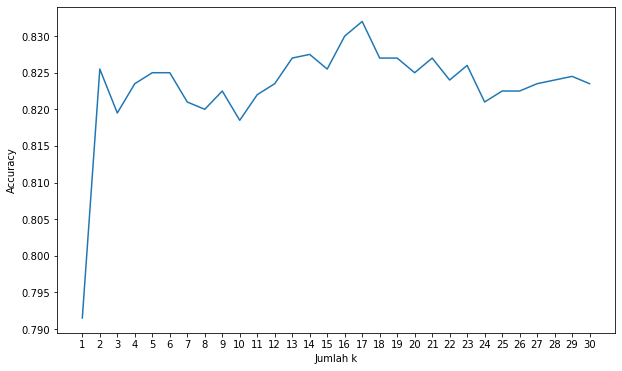

In [57]:
# visualisasi nilai akurasi terhadap jumlah k
plt.figure(figsize=(10,6))
loc = np.arange(1,31,step=1.0)
plt.plot(range(1,31), mean)
plt.xticks(loc)
plt.xlabel('Jumlah k')
plt.ylabel('Accuracy')
plt.show()

Best k = 17 mempunyai accuracy paling tinggi.

In [51]:
# Tampilkan confusion matrixfrom sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted_knn2))

[[1498   95]
 [ 255  152]]


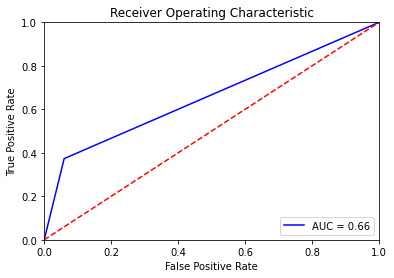

In [58]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         predicted_knn2)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Menggunakan  k = 17 dan Jarak = Manhattan**

In [52]:
# menggunakan k = 17 dan manhattan
knn3 = KNeighborsClassifier(n_neighbors = 17, metric= 'manhattan')
knn3.fit(X_train_clean,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=17)

In [53]:
# predict x_test
predicted_knn3 = knn3.predict(X_test_clean)

In [55]:
knn3.score(X_test_clean, y_test)

0.8285

In [54]:
print(classification_report(y_test, predicted_knn3))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1593
           1       0.68      0.30      0.42       407

    accuracy                           0.83      2000
   macro avg       0.76      0.63      0.66      2000
weighted avg       0.81      0.83      0.80      2000



In [59]:
print(confusion_matrix(y_test, predicted_knn3))

[[1534   59]
 [ 284  123]]


**Menggunakan  k = 17 dan Jarak = euclidean**

In [60]:
# menggunakan k = 17 dan manhattan
knn4 = KNeighborsClassifier(n_neighbors = 17, metric= 'euclidean')
knn4.fit(X_train_clean,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [61]:
# predict x_test
predicted_knn4 = knn4.predict(X_test_clean)

In [62]:
knn4.score(X_test_clean, y_test)

0.832

In [63]:
print(classification_report(y_test, predicted_knn4))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.71      0.29      0.41       407

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



In [64]:
print(confusion_matrix(y_test, predicted_knn4))
# [[tp, fp]]
# [[fn, tn]]

[[1545   48]
 [ 288  119]]


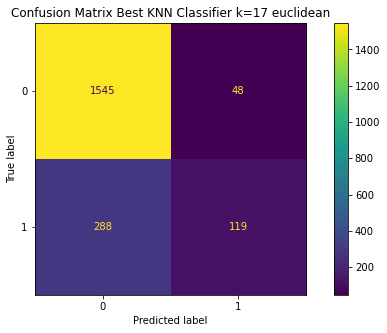

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test,predicted_knn4 , ax=ax)
_ = ax.set_title(
    f"Confusion Matrix Best KNN Classifier k=17 euclidean"
)

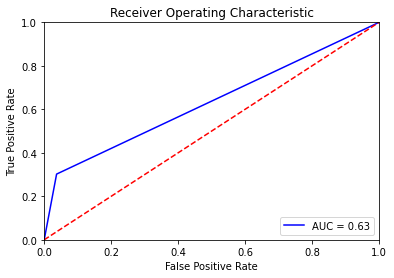

In [66]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         predicted_knn3)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Logistic Regression**

In [67]:
# Buat weight class karna data imbalance
n_samples = len(y_train)
n_classes = len(y_train.value_counts())
n_samples_j = y_train.value_counts()

class_weight = n_samples / (n_classes * n_samples_j)
class_weight

# Kita kasih weight yang lebih besar untuk kelas 1

Exited
0         0.627943
1         2.453988
dtype: float64

In [68]:
# Buat objek with class weight
logreg = LogisticRegression(class_weight = dict(class_weight),
                            solver = "liblinear",
                            random_state = 77)

In [69]:
# Buat objek2 tanpa weight
logreg2 = LogisticRegression(solver = "liblinear",
                            random_state = 78)

In [70]:
# Lakukan eksperimentasi class weight
from sklearn.model_selection import GridSearchCV

search_params = {"penalty": ["l1", "l2"]
                 ,"C": np.logspace(-5, 5, 20)
                }

logreg_cv = GridSearchCV(estimator = logreg,
                         param_grid = search_params,
                         cv = 5)

In [71]:
# Lakukan eksperimentasi tanpa class weight
search_params = {"penalty": ["l1", "l2"]
                 ,"C": np.logspace(-5, 5, 20)
                }

logreg_cv2 = GridSearchCV(estimator = logreg2,
                         param_grid = search_params,
                         cv = 5)

In [72]:
# Lakukan Fitting Data logreg dg weighted
logreg_cv.fit(X = X_train_clean,
              y = y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={(0,): 0.6279434850863422,
                                                        (1,): 2.4539877300613497},
                                          random_state=77, solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [73]:
# Lakukan Fitting Data logreg tanpa weighted
logreg_cv2.fit(X = X_train_clean,
              y = y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=78, solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [74]:
# Best params dengan weighted
logreg_cv.best_params_

{'C': 1e-05, 'penalty': 'l1'}

In [75]:
# Best params tanpa weighted
logreg_cv2.best_params_

{'C': 0.04832930238571752, 'penalty': 'l1'}

In [76]:
# Buat best model logreg dengan weighted
logreg = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                           # C = logreg_cv.best_params_["C"],
                            class_weight = dict(class_weight),
                            solver = "liblinear",
                            random_state = 123)

# Fit model
logreg.fit(X_train_clean, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight={(0,): 0.6279434850863422,
                                 (1,): 2.4539877300613497},
                   penalty='l1', random_state=123, solver='liblinear')

In [77]:
# Buat best model logreg tanpa weighted
logreg2 = LogisticRegression(penalty = logreg_cv2.best_params_["penalty"],
                            #C = logreg_cv2.best_params_["C"],
                            solver = "liblinear",
                            random_state = 1234)

# Fit model
logreg2.fit(X_train_clean, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(penalty='l1', random_state=1234, solver='liblinear')

In [78]:
# Predict logreg dengan weighted
predicted_logreg = logreg.predict(X_train_clean)
predicted_logreg

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [79]:
# Predict logreg tanpa weighted
predicted_logreg2 = logreg2.predict(X_train_clean)
predicted_logreg2

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
# Tampilkan confusion matrix dg weight
confusion_matrix(y_true = y_train,
                 y_pred = predicted_logreg)

# [[tp, fp]]
# [[fn, tn]]

array([[4574, 1796],
       [ 495, 1135]], dtype=int64)

In [81]:
# Tampilkan confusion matrix tanpa weight
confusion_matrix(y_true = y_train,
                 y_pred = predicted_logreg2)

# [[tp, fp]]
# [[fn, tn]]

array([[6146,  224],
       [1276,  354]], dtype=int64)

In [82]:
# performance metric dg weight
print(classification_report(y_true = y_train,
                            y_pred = predicted_logreg))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6370
           1       0.39      0.70      0.50      1630

    accuracy                           0.71      8000
   macro avg       0.64      0.71      0.65      8000
weighted avg       0.80      0.71      0.74      8000



In [83]:
# performance metric tanpa weighted 
print(classification_report(y_true = y_train,
                            y_pred = predicted_logreg2))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6370
           1       0.61      0.22      0.32      1630

    accuracy                           0.81      8000
   macro avg       0.72      0.59      0.61      8000
weighted avg       0.78      0.81      0.77      8000



Dapat dilihat bahwa jika melakukan pembobotan pada data imbalance maka nilai False Positive kecil tetapi akurasi hanya 71%. Jika tidak melakukan pembobotan False Positive besar tetapi akurasi juga besar yaitu 81%.

In [84]:
# Buat prediksi probability
y_pred_test_proba = logreg.predict_proba(X_test_clean)
y_pred_test_proba

# [1 - P(y = 1), P(y = 1)]

array([[0.42137472, 0.57862528],
       [0.52147164, 0.47852836],
       [0.7115472 , 0.2884528 ],
       ...,
       [0.53295743, 0.46704257],
       [0.41507539, 0.58492461],
       [0.54003589, 0.45996411]])

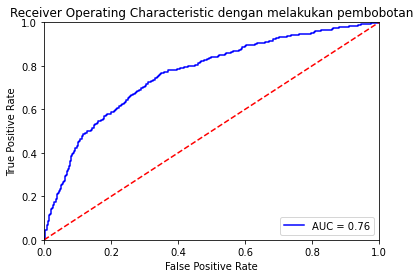

In [85]:
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_test_proba[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic dengan melakukan pembobotan')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
# Koefisien/slope logistic regression
logreg.coef_

array([[-0.04093891,  0.02899209,  0.83867212, -0.04689053,  0.20119256,
        -0.04289406,  0.        ,  0.31895688, -0.00092781, -0.25738796,
        -0.01378832, -0.48424888]])

In [87]:
# Intercept linear regression
logreg.intercept_

array([-0.29923737])

**Random Forest Classifier**

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
# Build random forest experiment dg n_estimator 350
rf1 = RandomForestClassifier(n_estimators = 350,
                                max_features = "log2",
                                random_state = 111)

In [52]:
# Fit random forest
rf1.fit(X_train_clean, y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8744\2043362730.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train_clean, y_train)


RandomForestClassifier(max_features='log2', n_estimators=350, random_state=111)

In [53]:
# Predict train
y_pred_train = rf1.predict(X_train_clean)

# accuracy
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.47      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [54]:
# Mencari parmeter terbaik untuk random forest dg GridSearchCV
params = {"n_estimators": [10,20,50,100,150,200,250,300,350],
          "criterion" : ["gini", "entropy","log_loss"],
          "max_features": ["sqrt", "log2"]
         }
# Buat gridsearch
rf2 = RandomForestClassifier(random_state = 111)

rf2_cv = GridSearchCV(estimator = rf2,
                          param_grid = params,
                          cv = 5)

In [55]:
# Fit grid search cv
rf2_cv.fit(X_train_clean, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=111),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 100, 150, 200, 250, 300,
                                          350]})

In [56]:
# Best params
rf2_cv.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}

In [57]:
# Refit the Random Forest
rf3 = RandomForestClassifier(max_features = rf2_cv.best_params_["max_features"],
                             criterion = rf2_cv.best_params_["criterion"],
                             n_estimators = rf2_cv.best_params_["n_estimators"],
                             random_state = 111)

rf3.fit(X_train_clean, y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8744\816026304.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3.fit(X_train_clean, y_train)


RandomForestClassifier(max_features='sqrt', n_estimators=300, random_state=111)

In [58]:
# Predict test
y_pred_test2 = rf3.predict(X_test_clean)

In [59]:
# Metric Performance
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test2))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.74      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [60]:
# Tampilkan confusion matrix
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test2)

# [[tp, fp]]
# [[fn, tn]]

array([[1527,   66],
       [ 215,  192]], dtype=int64)

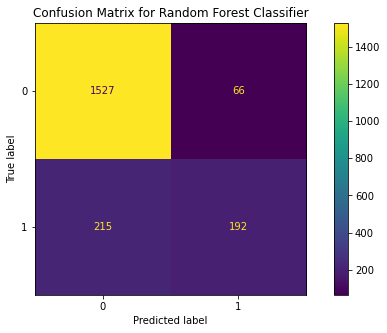

In [61]:
# visualisasi confussion matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test2 , ax=ax)
_ = ax.set_title(
    f"Confusion Matrix for Random Forest Classifier"
)